In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from sklearn.preprocessing import StandardScaler
import scipy.stats as st

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from ab_test.user import User
from ab_test.experiment import *
from ab_test.hasher_implems import *

In [3]:
# Generation of data

def gen_data(hasher: Hasher, population):
    
    header = ["userId", "ExperimentA", "ModA", "ExperimentB", "ModB"]
    data = []
    
    expA = Experiment(hasher)
    expB = Experiment(hasher)
    
    for i in range(1, population):
        user = User(i)
        varA = expA.assign(user)
        varB = expB.assign(user)
        data.append([user.id, varA.name, hasher.hash(f"{user.id}{expA.id}") % 100, varB.name, hasher.hash(f"{user.id}{expB.id}") % 100])

    df = pd.DataFrame(np.array(data), columns=header)
    
    df = pd.concat([pd.to_numeric(df["userId"]),
                  df["ExperimentA"],
                  pd.to_numeric(df["ModA"]),
                  df["ExperimentB"],
                  pd.to_numeric(df["ModB"])],
                  axis = 1)
    return df

## Built-In Hash Method

In [4]:
# Built-In Hash

df_bi = gen_data(BuiltInHasher(), 1000)

df_bi.info()
df_bi.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
userId         999 non-null int64
ExperimentA    999 non-null object
ModA           999 non-null int64
ExperimentB    999 non-null object
ModB           999 non-null int64
dtypes: int64(3), object(2)
memory usage: 39.1+ KB


,userId,ExperimentA,ModA,ExperimentB,ModB
0,1,variation1,43,variation1,49
1,2,variation2,5,variation1,52
2,3,variation2,13,variation2,29
3,4,variation1,14,variation2,47
4,5,variation1,99,variation1,18


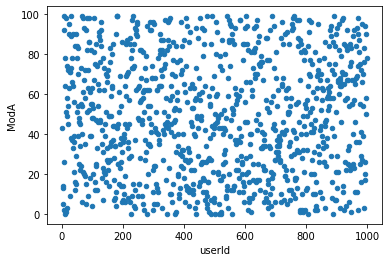

In [5]:
data_bi = pd.concat([df_bi["userId"], df_bi["ModA"]], axis = 1)
data_bi.plot.scatter(x="userId", y="ModA");

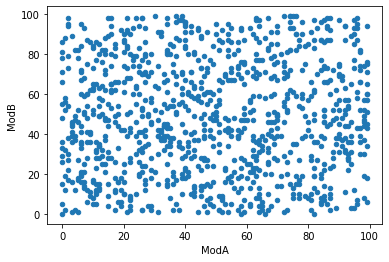

In [6]:
data_bi = pd.concat([df_bi["ModA"], df_bi["ModB"]], axis = 1)
data_bi.plot.scatter(x="ModA", y="ModB");

## MD5

In [7]:
# MD5

df_md5 = gen_data(Md5Hasher(), 1000)

df_md5.head()

,userId,ExperimentA,ModA,ExperimentB,ModB
0,1,variation2,89,variation1,47
1,2,variation2,78,variation2,76
2,3,variation2,96,variation1,21
3,4,variation2,52,variation2,25
4,5,variation1,2,variation2,13


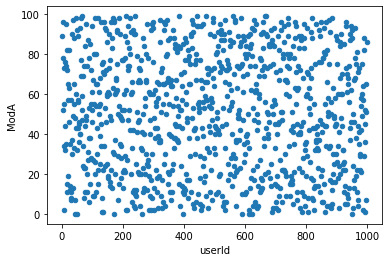

In [8]:
data_md5 = pd.concat([df_md5["userId"], df_md5["ModA"]], axis = 1)
data_md5.plot.scatter(x="userId", y="ModA");

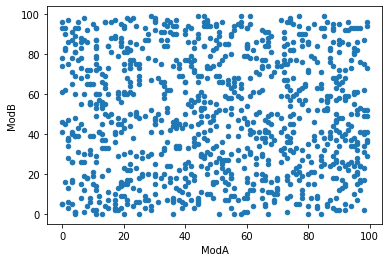

In [9]:
data_md5 = pd.concat([df_md5["ModA"], df_md5["ModB"]], axis = 1)
data_md5.plot.scatter(x="ModA", y="ModB");

## SHA256

In [10]:
# SHA256

df_sha = gen_data(Sha256Hasher(), 1000)

df_sha.head()

,userId,ExperimentA,ModA,ExperimentB,ModB
0,1,variation1,37,variation1,71
1,2,variation1,95,variation1,52
2,3,variation1,38,variation1,22
3,4,variation1,49,variation2,40
4,5,variation2,91,variation2,42


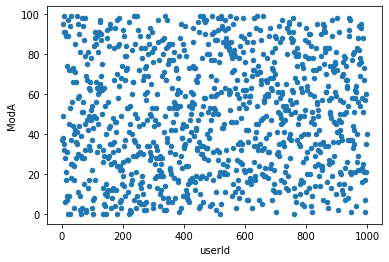

In [11]:
data_sha = pd.concat([df_sha["userId"], df_sha["ModA"]], axis = 1)
data_sha.plot.scatter(x="userId", y="ModA");

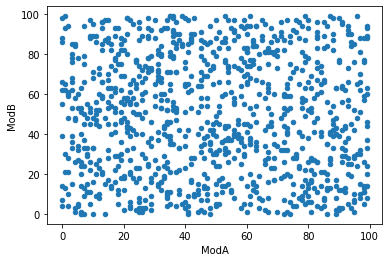

In [12]:
data_sha = pd.concat([df_sha["ModA"], df_sha["ModB"]], axis = 1)
data_sha.plot.scatter(x="ModA", y="ModB");